In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("top250-00-19.csv")

In [57]:
rows = df.shape[0] + 1

In [58]:
age_sum = sum(df['Age'])

In [59]:
#mean age of players in the data
mean_age = age_sum / rows
print(mean_age)

24.333546054031057


In [60]:
league_to = df['League_to']

In [61]:
count = league_to.value_counts()
count['other'] = sum(count[11:])
count.sort_values(ascending=False)
filtered_counts = count[count > 72]

In [62]:
print(filtered_counts)
#Counts of what leagues transfers go to

Premier League    1256
Serie A            739
LaLiga             525
1.Bundesliga       422
Ligue 1            397
Premier Liga       328
Süper Lig          143
Liga NOS           127
Super League       122
Eredivisie         108
other              461
Name: League_to, dtype: int64


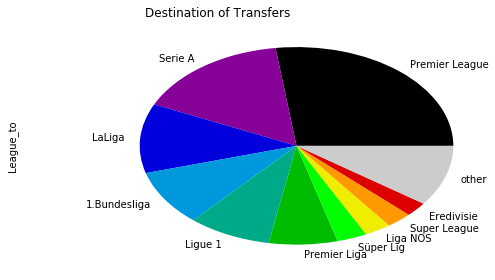

In [63]:
colormap = plt.cm.nipy_spectral
filtered_counts.plot(kind="pie", colormap=colormap, title="Destination of Transfers")
left, right = plt.xlim()
plt.xlim(left - 0.5, right - 0.5)
plt.tight_layout()
plt.show()


In [64]:
league_from = df["League_from"]
count = league_from.value_counts()
count['other'] = sum(count[11:])
count.sort_values(ascending=False)
filtered_counts = count[count > 100]
print(filtered_counts)
#Counts of what leagues transfers come from

Premier League     608
Serie A            602
Ligue 1            428
LaLiga             418
1.Bundesliga       265
Série A            199
Championship       197
Eredivisie         190
Liga NOS           178
Premier Liga       169
Super League       108
other             1338
Name: League_from, dtype: int64


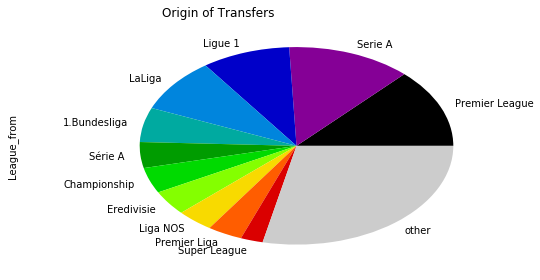

In [65]:
colormap = plt.cm.nipy_spectral
filtered_counts.plot(kind="pie", colormap=colormap, title="Origin of Transfers")
left, right = plt.xlim()
plt.xlim(left - 0.5, right - 0.5)
plt.tight_layout()
plt.show()

In [66]:
#Interesting to note: Half of the transfers originate in smaller leagues

In [67]:
#Now we will explore the average cost based on position
cost_by_position = df[['Position', 'Transfer_fee']]
cost_by_position['Position'].value_counts()



Centre-Forward        1218
Centre-Back            714
Central Midfield       487
Attacking Midfield     426
Defensive Midfield     411
Right Winger           305
Left Winger            267
Left-Back              225
Right-Back             181
Goalkeeper             180
Second Striker         130
Left Midfield           87
Right Midfield          63
Forward                  3
Midfielder               1
Defender                 1
Sweeper                  1
Name: Position, dtype: int64

In [68]:
#Clean the data to group similar positions together
cost_by_position.loc[cost_by_position.Position == 'Left Winger', 'Position'] = 'Left Midfield'
cost_by_position.loc[cost_by_position.Position == 'Second Striker', 'Position'] = 'Centre-Forward'
cost_by_position.loc[cost_by_position.Position == 'Right Winger', 'Position'] = 'Right Midfield'
cost_by_position.loc[cost_by_position.Position == 'Sweeper', 'Position'] = 'Centre-Back'
cost_by_position.loc[cost_by_position.Position == 'Defender', 'Position'] = 'Centre-Back'
cost_by_position.loc[cost_by_position.Position == 'Midfielder', 'Position'] = 'Central Midfield'
cost_by_position.loc[cost_by_position.Position == 'Forward', 'Position'] = 'Centre-Forward'
cost_by_position['Position'].value_counts()

/Users/jarrettbrunner/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Centre-Forward        1351
Centre-Back            716
Central Midfield       488
Attacking Midfield     426
Defensive Midfield     411
Right Midfield         368
Left Midfield          354
Left-Back              225
Right-Back             181
Goalkeeper             180
Name: Position, dtype: int64

In [69]:
means = cost_by_position.groupby('Position')['Transfer_fee'].mean()
average_costs = means.tolist()

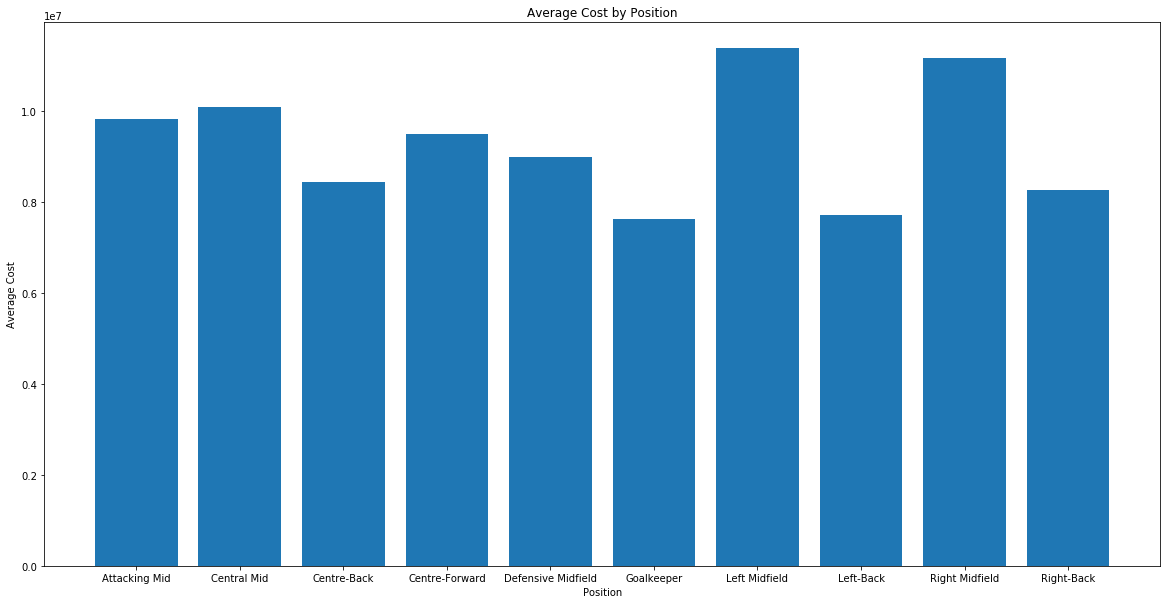

In [71]:
positions = ["Attacking Mid", "Central Mid", "Centre-Back", "Centre-Forward", "Defensive Midfield", "Goalkeeper",
             "Left Midfield", "Left-Back", "Right Midfield", "Right-Back"]

x_pos = np.arange(len(positions))
plt.figure(figsize=(20,10))
plt.bar(x_pos, average_costs, align='center', alpha=1)
plt.xticks(x_pos, positions)
plt.ylabel('Average Cost')
plt.xlabel('Position')
plt.title('Average Cost by Position')
plt.show()


In [74]:
#Now I want to demonstrate the growth in average transfer fees over the years
Years_and_Fees = df[['Season', 'Transfer_fee']]
Years_and_Fees.tail()

,Season,Transfer_fee
4695,2018-2019,4800000
4696,2018-2019,4800000
4697,2018-2019,4500000
4698,2018-2019,4500000
4699,2018-2019,4500000


In [87]:
Average_by_year = Years_and_Fees.groupby('Season')['Transfer_fee'].mean()
Average_by_year.tolist()

[7511693.548387097,
 8308320.0,
 4697438.5245901635,
 4580619.834710744,
 5621733.870967742,
 5441578.947368421,
 6196144.578313253,
 8656209.677419355,
 8494880.0,
 8758112.449799197,
 8174448.979591837,
 8575220.883534137,
 8677741.935483871,
 11514880.0,
 11090284.552845528,
 13773830.64516129,
 15919680.0,
 19459754.098360654,
 14023142.857142856]

In [88]:
Seasons = set(df['Season'])
seasons = sorted(Seasons)
seasons

['2000-2001',
 '2001-2002',
 '2002-2003',
 '2003-2004',
 '2004-2005',
 '2005-2006',
 '2006-2007',
 '2007-2008',
 '2008-2009',
 '2009-2010',
 '2010-2011',
 '2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016',
 '2016-2017',
 '2017-2018',
 '2018-2019']

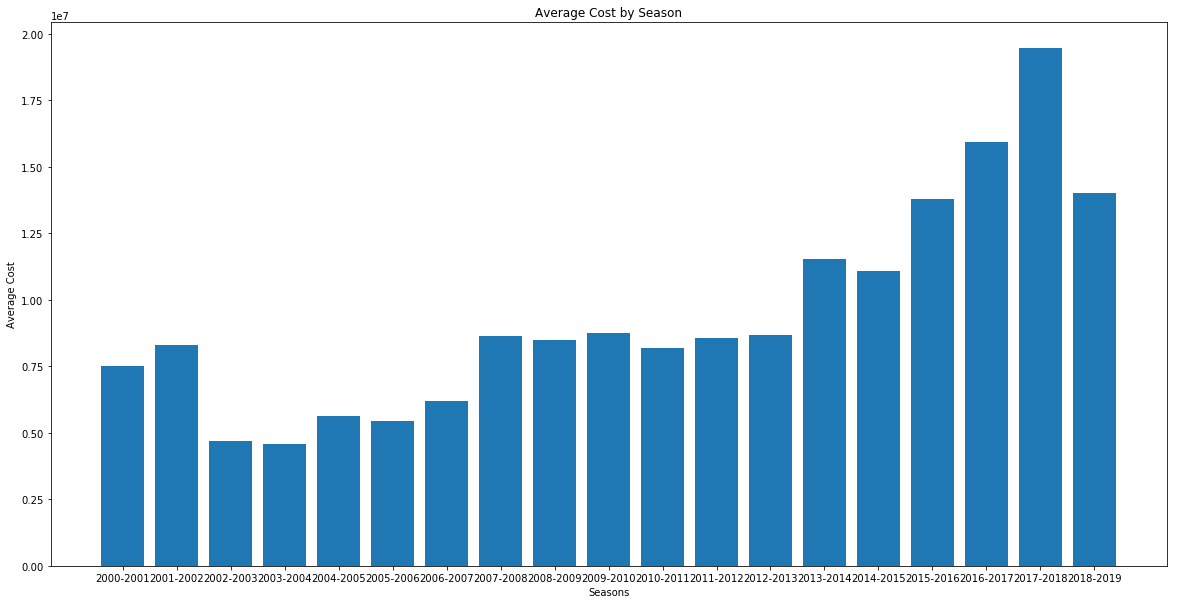

In [89]:
x_pos = np.arange(len(seasons))
plt.figure(figsize=(20,10))
plt.bar(x_pos, Average_by_year, align='center', alpha=1)
plt.xticks(x_pos, seasons)
plt.ylabel('Average Cost')
plt.xlabel('Seasons')
plt.title('Average Cost by Season')
plt.show()

In [ ]:
#Note that the 2018-2019 dataset is definitely not complete, so it is likely incorrect.
#We see that generally, transfer fees have significantly risen, as anyone familiar with football would agree.